# State Polygons

## Generating Polygons

This notebook focuses on generating the infrastructure for analyzing the states as polygons, including putting the data into useful formats and defining functions to plot the states.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import pickle, inspect
%matplotlib inline

state_polygons = pd.read_csv("../data/state-polygons.csv")
state_polygons.head()

,state,vertex,lat,lon
0,Alaska,0,70.0187,-141.0205
1,Alaska,1,70.1292,-141.7291
2,Alaska,2,70.4515,-144.8163
3,Alaska,3,70.7471,-148.4583
4,Alaska,4,70.7923,-151.1609


### Plotting States

To plot the states, we extract the longitudes and latitudes from the `state_polygons` dataframe and plot longitudes on the $x$-axis and latitudes on the $y$-axis. We also create a widget that will allow you to select a specific state to plot.

In [13]:
def plot_state(state):
    """
    Plots state as a polygon
    
    Arguments:
        state - name of state to plot
    """
    polygon = state_polygons[state_polygons["state"] == state]
    plt.plot("lon", "lat", data=polygon)
    plt.axis(option = "equal");
    
interact(
    plot_state,
    state = widgets.Dropdown(
        options = state_polygons["state"].unique()
    )
);

interactive(children=(Dropdown(description='state', options=('Alaska', 'Alabama', 'Arkansas', 'Arizona', 'Cali…

In order to use some of these functions in later notebooks, we define a function `write_to_utils` which takes in a function and writes the code for that function to the `utils.py` file.

In [3]:
def write_to_utils(function):
    """
    Writes function to utils.py file
    
    Arguments:
        function - name of function to be written
    """
    func = inspect.getsource(function)
    with open("utils.py", "r+") as f:
        if func.split(" ")[1] not in f.read():
            with open("utils.py", "a") as f:
                f.write(func + "\n")

In the cell below, we send both the `plot_state` and `write_to_utils` functions to the `utils.py` file.

In [4]:
write_to_utils(plot_state)
write_to_utils(write_to_utils)

### Incomplete Polygons

Polygons are easiest to analyze when they are closed; that is, when the list of points and defines their vertices contains the same first and last entry. Some of the states in the original data are open polygons, e.g. Ohio, so these polygons need to be closed.

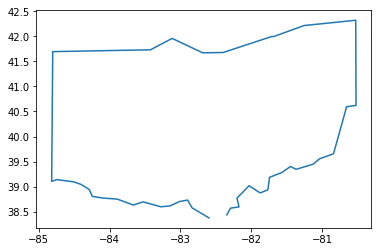

In [5]:
# incomplete polygon
plot_state("Ohio")

First, we define a function to filter the `state_polygons` dataframe for rows concerning only a single state and write it to the utils file.

In [6]:
def get_state(state):
    """
    Returns portion of `state_polygons` df for specific state
    
    Arguments:
        state - name of state to select
    """
    return state_polygons[state_polygons["state"] == state]

write_to_utils(get_state)

To complete all of the incomplete polygons, we start by extracting the minimum and maximum vertex ID for each state. Then, we iterate through the states and check whether or not the first and last points are the same. If they are, nothing happens. If the entries are different, a new row is appended to `state_polygons` dataframe for that state with vertex ID one above the maximum and latitude and longitude equal to the first vertex.

In [7]:
min_vertices = state_polygons.groupby("state")["vertex"].min()
max_vertices = state_polygons.groupby("state")["vertex"].max()

for state in state_polygons["state"].unique():
    specific_state = state_polygons[state_polygons["state"] == state]
    first_vertex = specific_state[specific_state["vertex"] == min_vertices[state]][["lat","lon"]].values[0]
    last_vertex = specific_state[specific_state["vertex"] == max_vertices[state]][["lat","lon"]].values[0]
    if sum(first_vertex == last_vertex) != 2:
        state_polygons = state_polygons.append({
            "state" : state,
            "vertex" : max_vertices[state] + 1,
            "lat" : specific_state[specific_state["vertex"] == min_vertices[state]]["lat"].values[0],
            "lon" : specific_state[specific_state["vertex"] == min_vertices[state]]["lon"].values[0]
        }, ignore_index = True)
        
state_polygons

,state,vertex,lat,lon
0,Alaska,0,70.0187,-141.0205
1,Alaska,1,70.1292,-141.7291
2,Alaska,2,70.4515,-144.8163
3,Alaska,3,70.7471,-148.4583
4,Alaska,4,70.7923,-151.1609
5,Alaska,5,71.1470,-152.6221
6,Alaska,6,71.1185,-153.9954
7,Alaska,7,71.4307,-154.8853
8,Alaska,8,71.5232,-156.7529
9,Alaska,9,71.2796,-157.9449


To check that this worked, we replot Ohio.

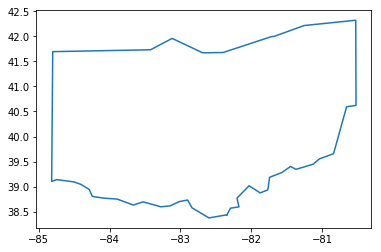

In [8]:
plot_state("Ohio")

To use these completed polygons in later notebooks, we export the dataframe as a CSV file below.

In [9]:
state_polygons.to_csv("../data/state-polygons-cleaned.csv", index=False)

### Generating Coordinates

In the last part of this notebook, we want to generate a dictionary which maps states to lists of (latitude, longitude) pairs that define their vertices. To this end, we first define a function `get_coords` which returns a list of the coordinates for a specified state.

In [10]:
def get_coords(state):
    """
    Gets list of (lat, lon) coordinates for specific state
    
    Arguments:
        state - name of state
    """
    state = state_polygons[state_polygons["state"] == state]
    coords = []
    for i in range(state.shape[0]):
        coords += [(state.iloc[i]["lat"], state.iloc[i]["lon"])]
    return coords

To generate the desired dictionary, we iterate through the status and add entries to the dictionary `polygons` where the key is the state name and the value is the result of calling `get_coords` on that state.

In [11]:
states = state_polygons["state"].unique()
polygons = {}
for state in states:
    polygons[state] = get_coords(state)
    
polygons["Wyoming"]

[(41.0037, -104.0556),
 (44.9949, -104.0584),
 (44.9998, -111.0539),
 (40.9986, -111.0457),
 (41.0006, -104.0556),
 (41.0037, -104.0556)]

For later use, we pickle the dictionary below.

In [12]:
with open("../data/polygons-pickle.txt", "w+b") as f:
    pickle.dump(polygons, f)